In [2]:
import sys,os
import numpy as np
import pandas as pd

import cv2
from matplotlib import pyplot as plt

In [3]:
MASK_RADIUS=660 # works for UKBB images

In [4]:
def compare_image(image1, image2):
  plt.figure(figsize=(9,9))
  plt.subplot(1,2,1)
  plt.imshow(image1)
  plt.title('Orignal')
  plt.axis('off')

  plt.subplot(1,2,2)
  plt.imshow(image2)
  plt.title('Modified')
  plt.axis('off')

  plt.tight_layout()

In [16]:
rawdir="/HDD/data/UKBB/fundus/raw/"
rawfiles = os.listdir(rawdir)

lwnetMean = pd.read_csv("/HDD/data/UKBB/fundus/qcStats/lwnetmean.csv", header=None)
lwnetMean.columns = ['file', 'mean']

In [18]:
len(rawfiles)

173814

In [7]:
stats = pd.DataFrame({'file':rawfiles, 'mean':np.nan,'stdev':np.nan,'quintdist':np.nan})

for i,myf in enumerate(rawfiles[0:200]):
    img = plt.imread(rawdir+myf)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hh,ww=img.shape[:2]
    #print(hh//2,ww//2)

    mask = np.zeros_like(gray)
    mask = cv2.circle(mask, (ww//2,hh//2), MASK_RADIUS, (255,255,255), -1)
    #mask = np.invert(mask.astype(bool))

    #result = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
    #result[:, :] = mask[:,:]
#    result[:, :, 3] = mask[:,:,0]
    #plt.imshow(result)

    mskd_img=np.ma.array(gray, mask=np.invert(mask.astype(bool)))

    stats['mean'].iloc[i]=mskd_img.mean()*255
    stats['stdev'].iloc[i]=mskd_img.std()*255 / stats['mean'].iloc[i]


/SSD/home/michael/.local/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [8]:
stats=stats.sort_values("stdev",ascending=False)

200


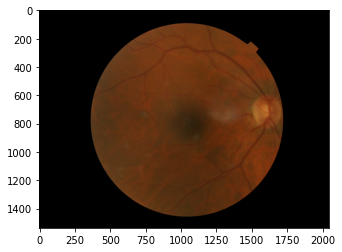

In [9]:
i = i+1
print(i)
img = plt.imread(rawdir+stats['file'].iloc[i])
plt.imshow(img)

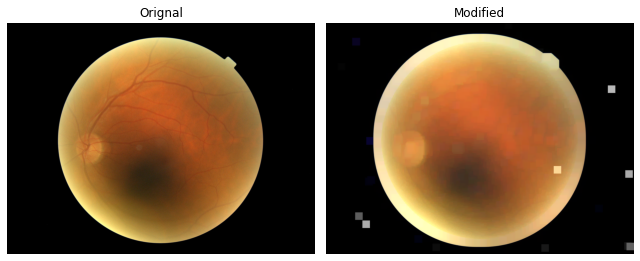

In [276]:
kernel = np.ones((50,50),np.uint8)
dilation = cv2.dilate(img,kernel,iterations=1)
compare_image(img,dilation)
